## MCP server

Read more about it at https://openai.github.io/openai-agents-python/mcp/
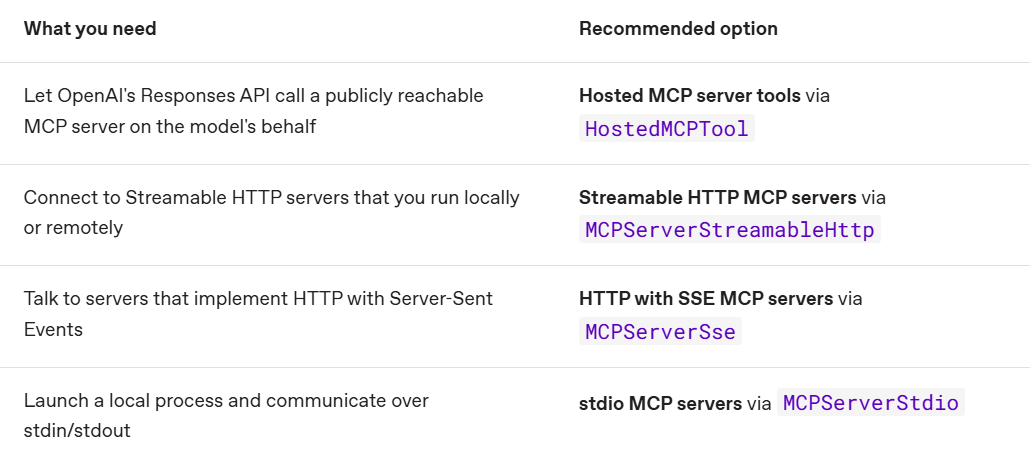

For demo purpose we will use Local MCP connection so we will use MCPServerStdio

#### Import

To use local MCP server, import MCPServerStdio from agents.mcp


In [1]:
from dotenv import load_dotenv
from agents import Runner, trace, function_tool, Agent, OpenAIChatCompletionsModel, SQLiteSession
from openai import AsyncOpenAI
from agents.mcp import MCPServerStdio

#### Lets try the fetch MCP server

Read more at https://pypi.org/project/mcp-server-fetch/

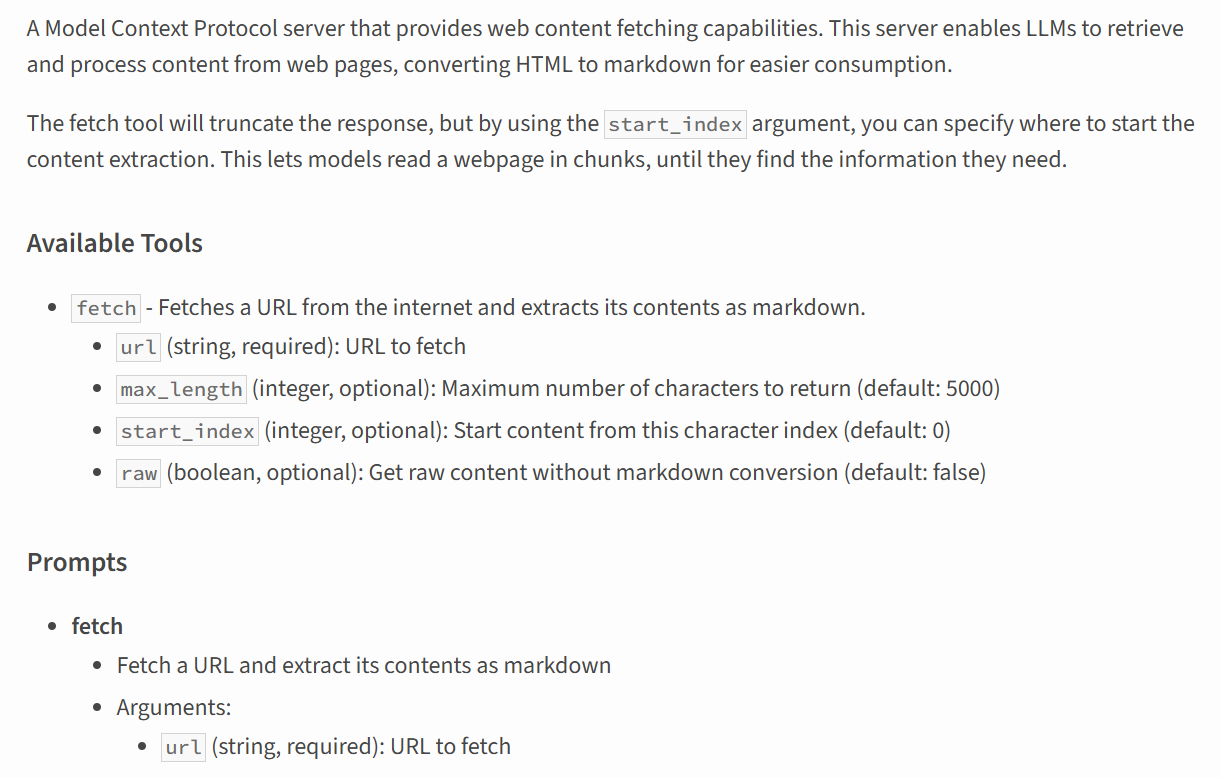

#### Load Environment

In [2]:
load_dotenv(override=True)

True

#### Check available tools in fetch MCP

In [ ]:
fetch_params = {"command": "uvx", "args": ["mcp-server-fetch"]}

async with MCPServerStdio(params=fetch_params, client_session_timeout_seconds=60) as server:
    fetch_tools = await server.list_tools()

fetch_tools

#### Define Model and a session

In [ ]:

# Define LLM model
# model = "gpt-4.1-mini"

# Define the OpenAI client pointing to a local LLM server
client = AsyncOpenAI(base_url="http://localhost:11434/v1")

# Define model using the local LLM server client
# use gpt-oss which is better for tool usage and reasoning even though it takes time
model = OpenAIChatCompletionsModel(model = "gpt-oss",openai_client= client)


# Define a session to maintain context across interactions
session = SQLiteSession("bioinfo_agent_session.db")


#### Define and Run Agent

In [ ]:
fetch_params = {"command": "uvx", "args": ["mcp-server-fetch"]}

instructions_dbnsfp = (
        "You are a specialized agent for dbNSFP. Your task is to read the latest release notes from https://www.dbnsfp.org/releases and produce a concise, well-formatted markdown summary. "
        "Focus only on the following: release version, release date, and a bulleted list of major changes or updates. Do not include any unrelated information or file operations. Output only the markdown summary, with no extra commentary or code blocks."
    )

async with MCPServerStdio(params=fetch_params, client_session_timeout_seconds=60) as server:
    dbnsfp_agent = Agent(name="dbnsfp_agent",
                    instructions=instructions_dbnsfp,
                    model=model,
                    mcp_servers=[server])
    query="Find latest release summary of dbNSFP database from https://www.dbnsfp.org/releases"

    result = await Runner.run(dbnsfp_agent, query)
    print(result.final_output)
    

Below is a quick, step‑by‑step recipe for using **bcftools + tabix** to add DBNSFP‑derived fields to a *your‑own* VCF.  
I’ll also point you to the relevant dbNSFP/ bcftools documentation and the papers that describe the data you’re adding.

---

## 1.  Match reference build and variant representation

|                | dbNSFP v5.x | Your VCF |
|----------------|-------------|----------|
| Genomic build  | GRCh38 (or GRCh37 if you download the 37‑contig version) | Must match the same build |
| Transcript model | GENCODE 49 (Ensembl 115) | Same GENCODE/Ensembl version as the dbNSFP you downloaded |

If your VCF is on the opposite assembly you’ll need a liftover *before* annotation (e.g. `liftoverBed` + `bcftools annotate --snps-only` or use a two‑step liftover).

---

## 2.  Verify that dbNSFP is a **tabix‑indexable VCF**

The dbNSFP releases already ship as a compressed VCF (`dbNSFP*.vcf.gz`) **with a Tabix index** (`*.vcf.gz.tbi`).  
If you’re working from a source that does **not** 

### Pubmed MCP server. 

Try this. but not sure it is reliable.

In [ ]:
from agents.mcp import MCPServerStdio

fetch_params = {"command": "uvx", "args": ["pubmedmcp@latest"]}

async with MCPServerStdio(params=fetch_params, client_session_timeout_seconds=60) as server:
    pubmed_tools = await server.list_tools()

pubmed_tools

In [ ]:
from dotenv import load_dotenv
from agents import Runner, trace, function_tool, Agent, OpenAIChatCompletionsModel, SQLiteSession
from openai import AsyncOpenAI
from agents.mcp import MCPServerStdio


load_dotenv(override=True)


agent_instructions = """You are a helpful assistant for Bioinformatics research. 
You are equipped with pubmed mcp server. 
You can help users find relevant scientific articles, summarize research papers, and provide insights on various bioinformatics topics.
You must always search English articles. 
"""

# Define LLM model

# model = "gpt-4.1-mini"

# Define the OpenAI client pointing to a local LLM server
client = AsyncOpenAI(base_url="http://localhost:11434/v1")

# Define model using the local LLM server client
# use gpt-oss which is better for tool usage and reasoning even though it takes time
model = OpenAIChatCompletionsModel(model = "gpt-oss",openai_client= client)



# Define a session to maintain context across interactions
session = SQLiteSession("pubmed_agent_session.db")


fetch_params = {"command": "uvx", "args": ["pubmedmcp@latest"]}

async with MCPServerStdio(params=fetch_params, client_session_timeout_seconds=60) as server:
    pubmed_tools = await server.list_tools()

    bioinfo_agent = Agent(name="BioinformaticsAgent",
                    instructions=agent_instructions,
                    model=model,
                    mcp_servers=[server])
    
    #query = "Find recent articles on CRISPR gene editing in plants and summarize the key findings."
    query="Find 5 review articles on latest use of AI in genomics. Provide urls of the articles in markdown format."
    
    result = await Runner.run(bioinfo_agent, query, session=session)
    print(result.final_output)
